# Electro-descriptor analysis of two organic systems

## The analysis of the original data from the ACIE papper
> Y. Chen, B. Tian, Z. Cheng, X. Li, M. Huang, Y. Sun, S. Liu, X. Cheng, S. Li, M. Ding, Angew. Chem. Int. Ed. 2021, 60, 4199.

In the 2D space of potential and the tafel slope, there are several regions with sharp boundaries in which the substrates have relatively high reaction yields.

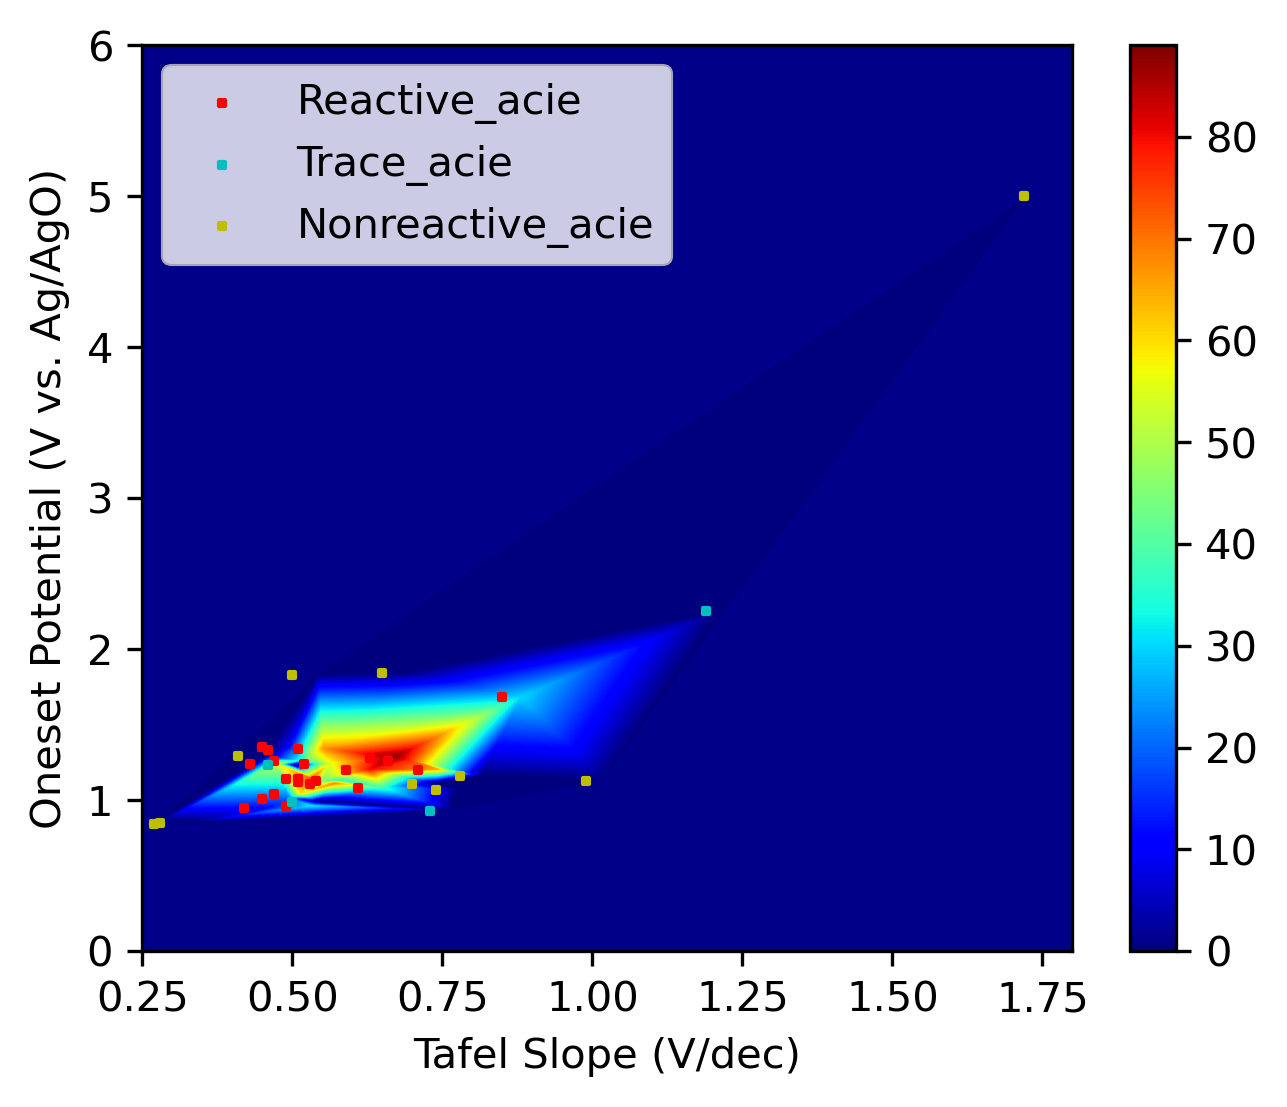

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import numpy as np

F2 = pd.read_excel('DataSI.xlsx','Table S4')
F2['Yield/ %'] = F2['Yield/ %'].str.strip()
TS = F2.iloc[:,1].to_list() #Tafel Slope
OP = F2.iloc[:,3].to_list() #Onset Potential

YD_pc = [x if x != "Trace" else  0 for x in F2.iloc[:,4].to_list() ]

F2_yd = F2[(F2['Yield/ %'] != "0")&(F2['Yield/ %'] != "Trace")]
F2_zero = F2[(F2['Yield/ %'] == "0")]
F2_trace = F2[(F2['Yield/ %'] == "Trace")]

rng = np.random.default_rng()
grid_x, grid_y = np.mgrid[0.2:1.8:0.005, 0:6:0.005]

res = griddata(
	(TS, OP),
	YD_pc,(grid_x, grid_y),
	fill_value=True,
    method='linear')
plt.figure(dpi=300,figsize=(5,4))
plt.xlabel('Tafel Slope (V/dec)')
plt.ylabel('Oneset Potential (V vs. Ag/AgO)')
plt.xlim((0.25,1.8))
plt.ylim((0,6))
plt.scatter(F2_yd.loc[:,'Tafel Slope/ V dec-1'],F2_yd.loc[:,'Onset potential/ V'],s=2,c="r",marker='s',label="Reactive_acie")
plt.scatter(F2_trace.loc[:,'Tafel Slope/ V dec-1'],F2_trace.loc[:,'Onset potential/ V'],s=2,c="c",marker='s',label="Trace_acie")
plt.scatter(F2_zero.loc[:,'Tafel Slope/ V dec-1'],F2_zero.loc[:,'Onset potential/ V'],s=2,c="y",marker='s',label="Nonreactive_acie")
plt.imshow(res.T,extent=(0.25,1.8,0,6),origin='lower',aspect="auto", cmap='jet')
plt.colorbar()
plt.legend(loc="best")

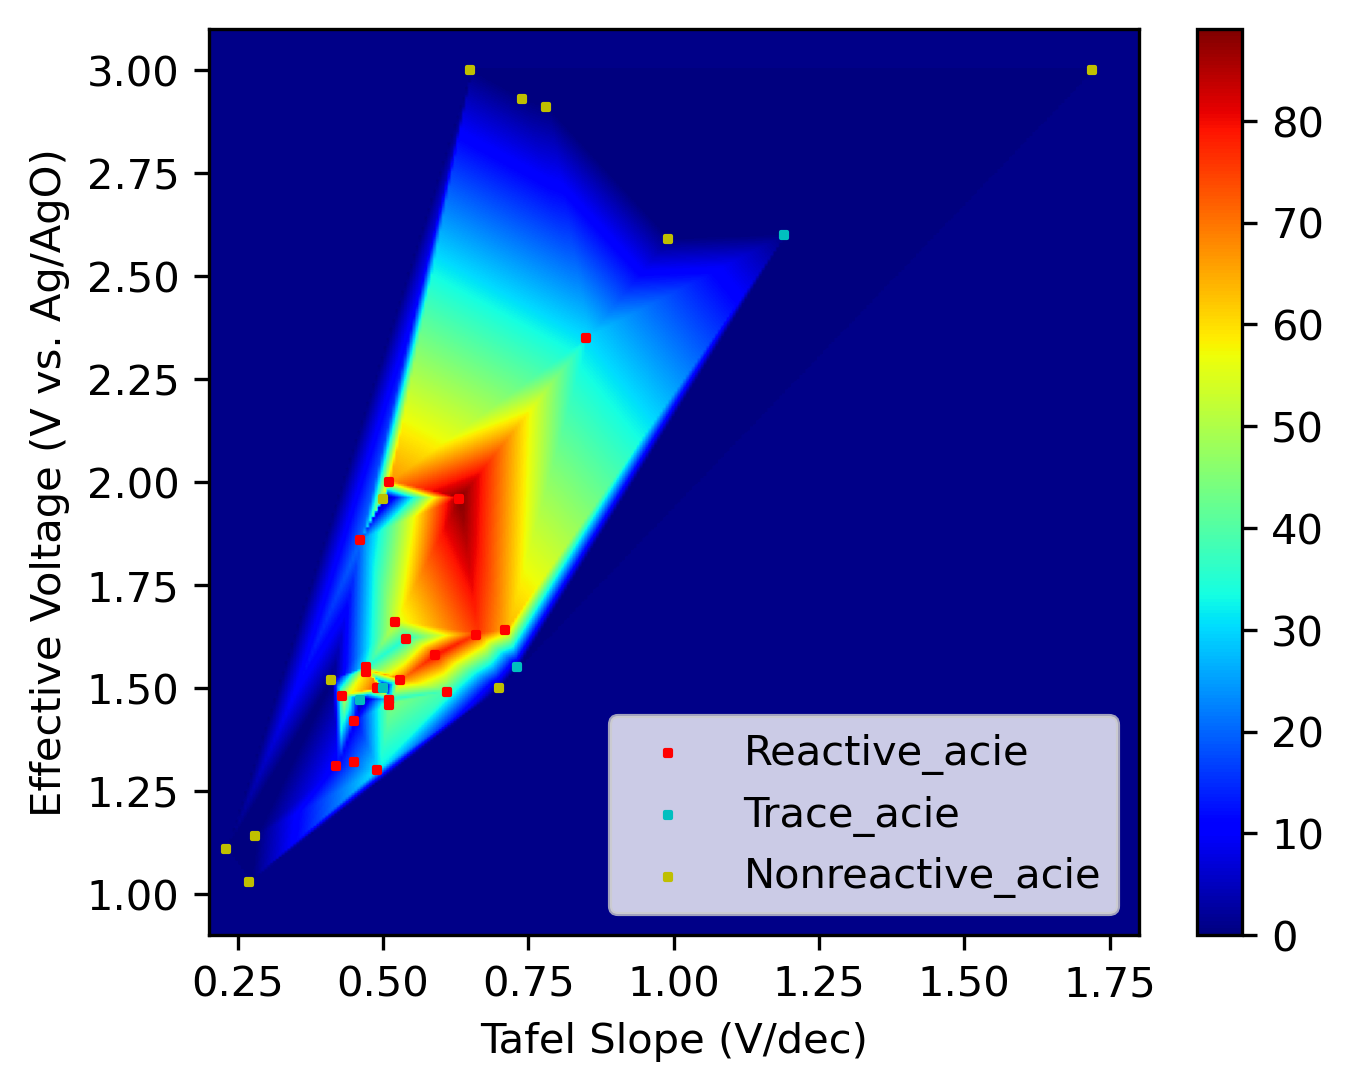

In [136]:
EP = F2.iloc[:,2].to_list() #Effective Voltage

rng = np.random.default_rng()
grid_x, grid_y = np.mgrid[0.2:1.8:0.005, 0:6:0.005]

res = griddata(
	(TS, EP),
	YD_pc,(grid_x, grid_y),
	fill_value=True,
    method='linear')

plt.figure(dpi=300,figsize=(5,4))
plt.xlabel('Tafel Slope (V/dec)')
plt.ylabel('Effective Voltage (V vs. Ag/AgO)')
plt.xlim((0.2,1.8))
plt.ylim((0.9,3.1))
plt.scatter(F2_yd.loc[:,'Tafel Slope/ V dec-1'],F2_yd.loc[:,'Effective Voltage/ V'],s=2,c="r",marker='s',label="Reactive_acie")
plt.scatter(F2_trace.loc[:,'Tafel Slope/ V dec-1'],F2_trace.loc[:,'Effective Voltage/ V'],s=2,c="c",marker='s',label="Trace_acie")
plt.scatter(F2_zero.loc[:,'Tafel Slope/ V dec-1'],F2_zero.loc[:,'Effective Voltage/ V'],s=2,c="y",marker='s',label="Nonreactive_acie")
plt.imshow(res.T,extent=(0.2,1.8,0,6),origin='lower',aspect="auto", cmap='jet')
plt.colorbar()
plt.legend(loc="best")


## The analysis of the original data from the ACIE papper with data from Shengchun Wang

When compared with CV data and experiment report, there are only one substrate has both CV data and yield.

So I assume that the amines with methyl group shares similar property with those with propyl group. Then we have three data points., they are:

In [137]:
WSC_data = pd.read_excel('/home/wxcpro/YouCanAdvance/RepeatExpriment/WSC_data/cv_com.xlsx')
wsc_app_yield = WSC_data[(WSC_data['app_yield_no_me'] != "NoFoundinPPT")&(WSC_data['app_yield_no_me'] != "None")&(WSC_data['solvent'] != "TFE")].iloc[:,[0,2,3,4,5,7]]
wsc_app_yield

,file_name,solvent,Onset potential/ V,Tafel Slope/ V dec-1,Effective Voltage/ V,app_yield_no_me
4,4NCPhSO2NH-Me,MeCN,3.19,0.500,3.41692,46
13,4MeOPhSO2NH-Pr,MeOH,1.75,0.165,1.85926,78
14,4MeOPhSO2NH-Me,MeCN,2.12,0.334,2.32301,53


When compared with the data from that ACIE paper, we find the area of WSC reaction with yield  is different from the ACIE one. This indicates that we can not merge data from both experiment for the machine learning.

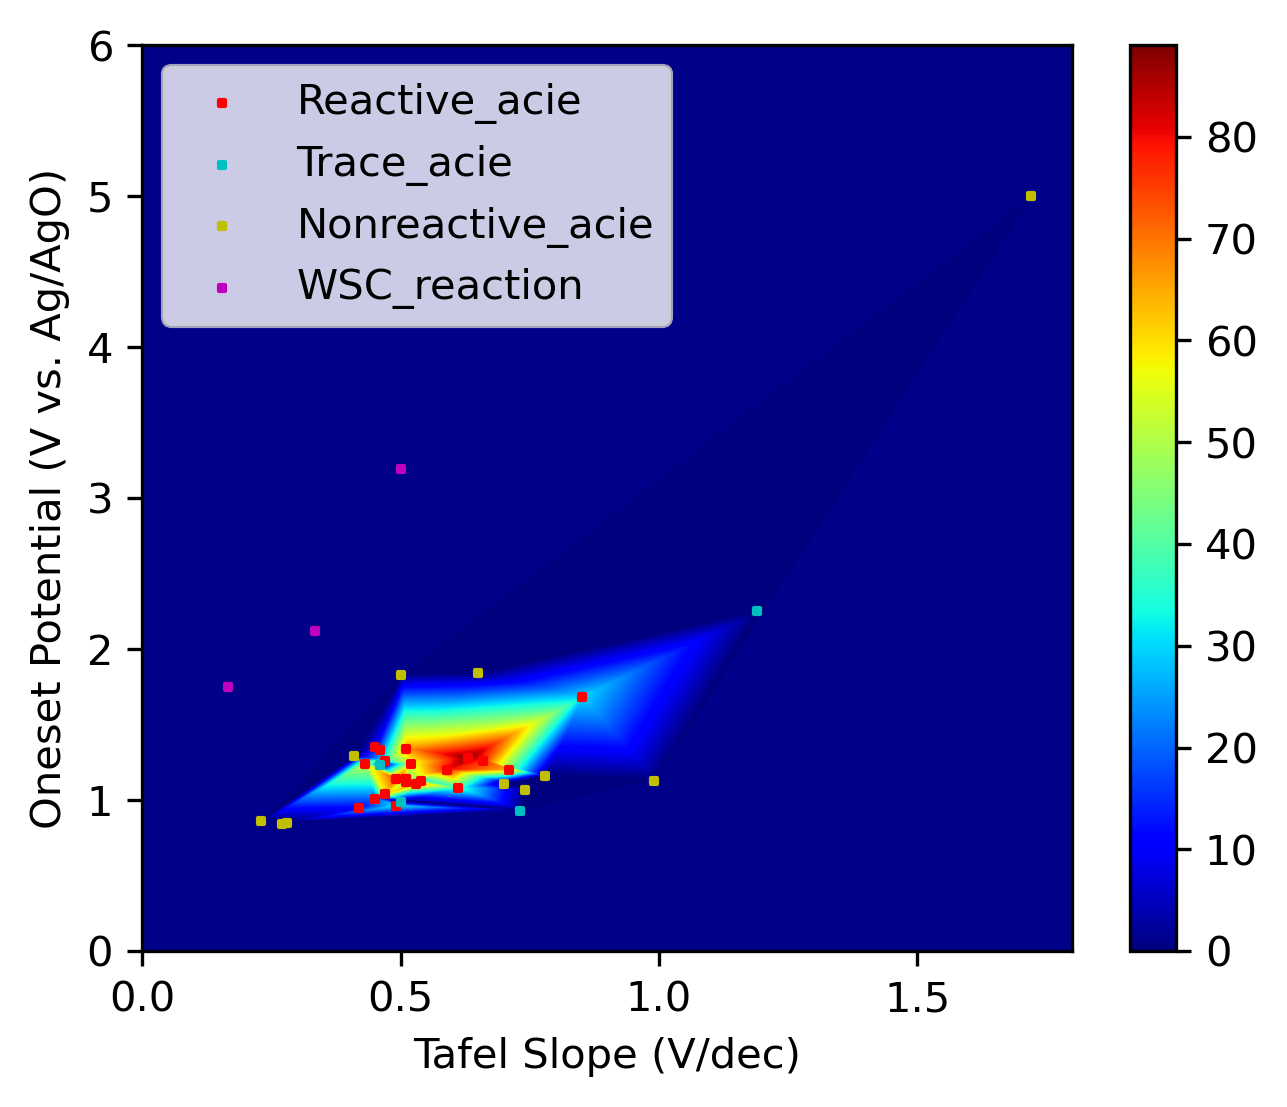

In [138]:
rng = np.random.default_rng()
grid_x, grid_y = np.mgrid[0:1.8:0.005, 0:6:0.005]

res = griddata(
	(TS, OP),
	YD_pc,(grid_x, grid_y),
	fill_value=True,
    method='linear')
plt.figure(dpi=300,figsize=(5,4))
plt.xlabel('Tafel Slope (V/dec)')
plt.ylabel('Oneset Potential (V vs. Ag/AgO)')
plt.xlim((0,1.8))
plt.ylim((0,6))
plt.scatter(F2_yd.loc[:,'Tafel Slope/ V dec-1'],F2_yd.loc[:,'Onset potential/ V'],s=2,c="r",marker='s',label="Reactive_acie")
plt.scatter(F2_trace.loc[:,'Tafel Slope/ V dec-1'],F2_trace.loc[:,'Onset potential/ V'],s=2,c="c",marker='s',label="Trace_acie")
plt.scatter(F2_zero.loc[:,'Tafel Slope/ V dec-1'],F2_zero.loc[:,'Onset potential/ V'],s=2,c="y",marker='s',label="Nonreactive_acie")
plt.scatter(wsc_app_yield.loc[:,'Tafel Slope/ V dec-1'],wsc_app_yield.loc[:,'Onset potential/ V'],s=2,c="m",marker='s',label="WSC_reaction")
plt.imshow(res.T,extent=(0,1.8,0,6),origin='lower',aspect="auto", cmap='jet')
plt.colorbar()
plt.legend(loc="best")

# Machine learning and visualized prediction of synthetic performance using electro-descriptors.

Since the lack of data, I decided to use theses three point for a training set, and predict the yield for those unknown.

In [139]:
print('The substances for predicition is:')
wsc_pre_yield = WSC_data[((WSC_data['app_yield_no_me'] == "NoFoundinPPT")|(WSC_data['app_yield_no_me'] == "None"))&(WSC_data['solvent'] != "TFE")].iloc[:,[0,2,3,4,5,7]]
wsc_pre_yield

The substances for predicition is:


,file_name,solvent,Onset potential/ V,Tafel Slope/ V dec-1,Effective Voltage/ V,app_yield_no_me
0,"2,4,6MePhSO2NH-Me",MeCN,2.48,0.482,2.60409,None
2,4BrPhSO2NH-Me,MeCN,2.80,0.368,2.94750,None
5,4tBuPhSO2NH-Me-2,MeCN,2.76,0.550,3.24038,NoFoundinPPT
7,4CF3PhSO2NH-Me,MeCN,3.13,0.414,3.27997,NoFoundinPPT
8,4MePhSO2NH-tBu,MeOH,1.96,0.441,2.06204,NoFoundinPPT
9,4ClPhSO2NH-Me,MeCN,2.85,0.379,2.98700,None
11,4FPhSO2NH-Me,MeCN,2.85,0.417,3.04246,NoFoundinPPT
16,naphthalene-SO2NH-Me,MeCN,1.90,0.536,3.74893,None
17,BenzofuranSO2NH-Me,MeCN,1.89,0.447,2.22427,NoFoundinPPT
18,pyridine-SO2NH-Me,MeCN,3.57,0.506,3.64602,NoFoundinPPT


## Prediction of synthetic performance using electro-descriptors via decision tree regression

In [140]:
from sklearn.tree import DecisionTreeRegressor

X = wsc_app_yield.iloc[:,[2,3,4]]
y = wsc_app_yield.iloc[:,[5]]

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)

# Predict
X_test = wsc_pre_yield.iloc[:,[2,3,4]]
y_1 = regr_1.predict(X_test)

DT_prediction = wsc_pre_yield.copy()
DT_prediction['DT_prediction']= y_1
DT_prediction.iloc[:,[0,2,3,4,6]]

,file_name,Onset potential/ V,Tafel Slope/ V dec-1,Effective Voltage/ V,DT_prediction
0,"2,4,6MePhSO2NH-Me",2.48,0.482,2.60409,53.0
2,4BrPhSO2NH-Me,2.80,0.368,2.94750,46.0
5,4tBuPhSO2NH-Me-2,2.76,0.550,3.24038,46.0
7,4CF3PhSO2NH-Me,3.13,0.414,3.27997,46.0
8,4MePhSO2NH-tBu,1.96,0.441,2.06204,53.0
9,4ClPhSO2NH-Me,2.85,0.379,2.98700,46.0
11,4FPhSO2NH-Me,2.85,0.417,3.04246,46.0
16,naphthalene-SO2NH-Me,1.90,0.536,3.74893,78.0
17,BenzofuranSO2NH-Me,1.89,0.447,2.22427,78.0
18,pyridine-SO2NH-Me,3.57,0.506,3.64602,46.0


For decision tree regression, it needs for more data points for the accurate prediction, otherwise it just play as a classification. The inner strucutre of the prdiction modle is shown below:


[Text(0.4, 0.8333333333333334, 'X[0] <= 1.935\nsquared_error = 188.667\nsamples = 3\nvalue = 59.0'),
 Text(0.2, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 78.0'),
 Text(0.6, 0.5, 'X[2] <= 2.87\nsquared_error = 12.25\nsamples = 2\nvalue = 49.5'),
 Text(0.4, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 53.0'),
 Text(0.8, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 46.0')]

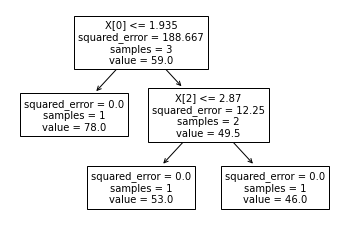

In [166]:
from sklearn import tree
tree.plot_tree(regr_1)

## Prediction of synthetic performance using electro-descriptors via Nearest Neighbors regression

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

n_neighbors = 3

knn = neighbors.KNeighborsRegressor(n_neighbors, weights="distance")
y_ = knn.fit(X, y).predict(X_test)

knn_prediction = wsc_pre_yield.copy()
knn_prediction['knn_prediction_yield']= y_
knn_prediction.iloc[:,[0,2,3,4,6]]

,file_name,Onset potential/ V,Tafel Slope/ V dec-1,Effective Voltage/ V,knn_prediction_yield
0,"2,4,6MePhSO2NH-Me",2.48,0.482,2.60409,57.189326
2,4BrPhSO2NH-Me,2.80,0.368,2.94750,54.549547
5,4tBuPhSO2NH-Me-2,2.76,0.550,3.24038,52.799786
7,4CF3PhSO2NH-Me,3.13,0.414,3.27997,49.000712
8,4MePhSO2NH-tBu,1.96,0.441,2.06204,62.544754
9,4ClPhSO2NH-Me,2.85,0.379,2.98700,53.950694
11,4FPhSO2NH-Me,2.85,0.417,3.04246,53.461847
16,naphthalene-SO2NH-Me,1.90,0.536,3.74893,56.934165
17,BenzofuranSO2NH-Me,1.89,0.447,2.22427,60.624029
18,pyridine-SO2NH-Me,3.57,0.506,3.64602,51.076382


For Nearest Neighbors regression, it predict the yield based on the distance with the known data points. In the case of limited data, only trends in yield changes are predicted.